<a href="https://colab.research.google.com/github/saraswatiyangandul20/Analysis-of-Bank-Debit-Collection-and-Recovery-Strategies/blob/main/Mortagage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting the mortagage backed securities prepayment risk using Machine learning Models**

In [37]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
# reading data file
dir_path = '/content/LoanExport.csv'
df = pd.read_csv(dir_path)

<ipython-input-38-540441ebf30c>:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dir_path)


In [39]:
x = df.shape
print(f'The dataset has {x[0]} rows and {x[1]} columns')

The dataset has 291451 rows and 28 columns


In [40]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [41]:
df.tail()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
291446,839,199903,N,202902,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32
291450,849,199903,N,202902,37964,0,1,O,47,29,...,18900,F199Q1220923,P,360,2,Ot,Other servicers,0,0,29


<Axes: >

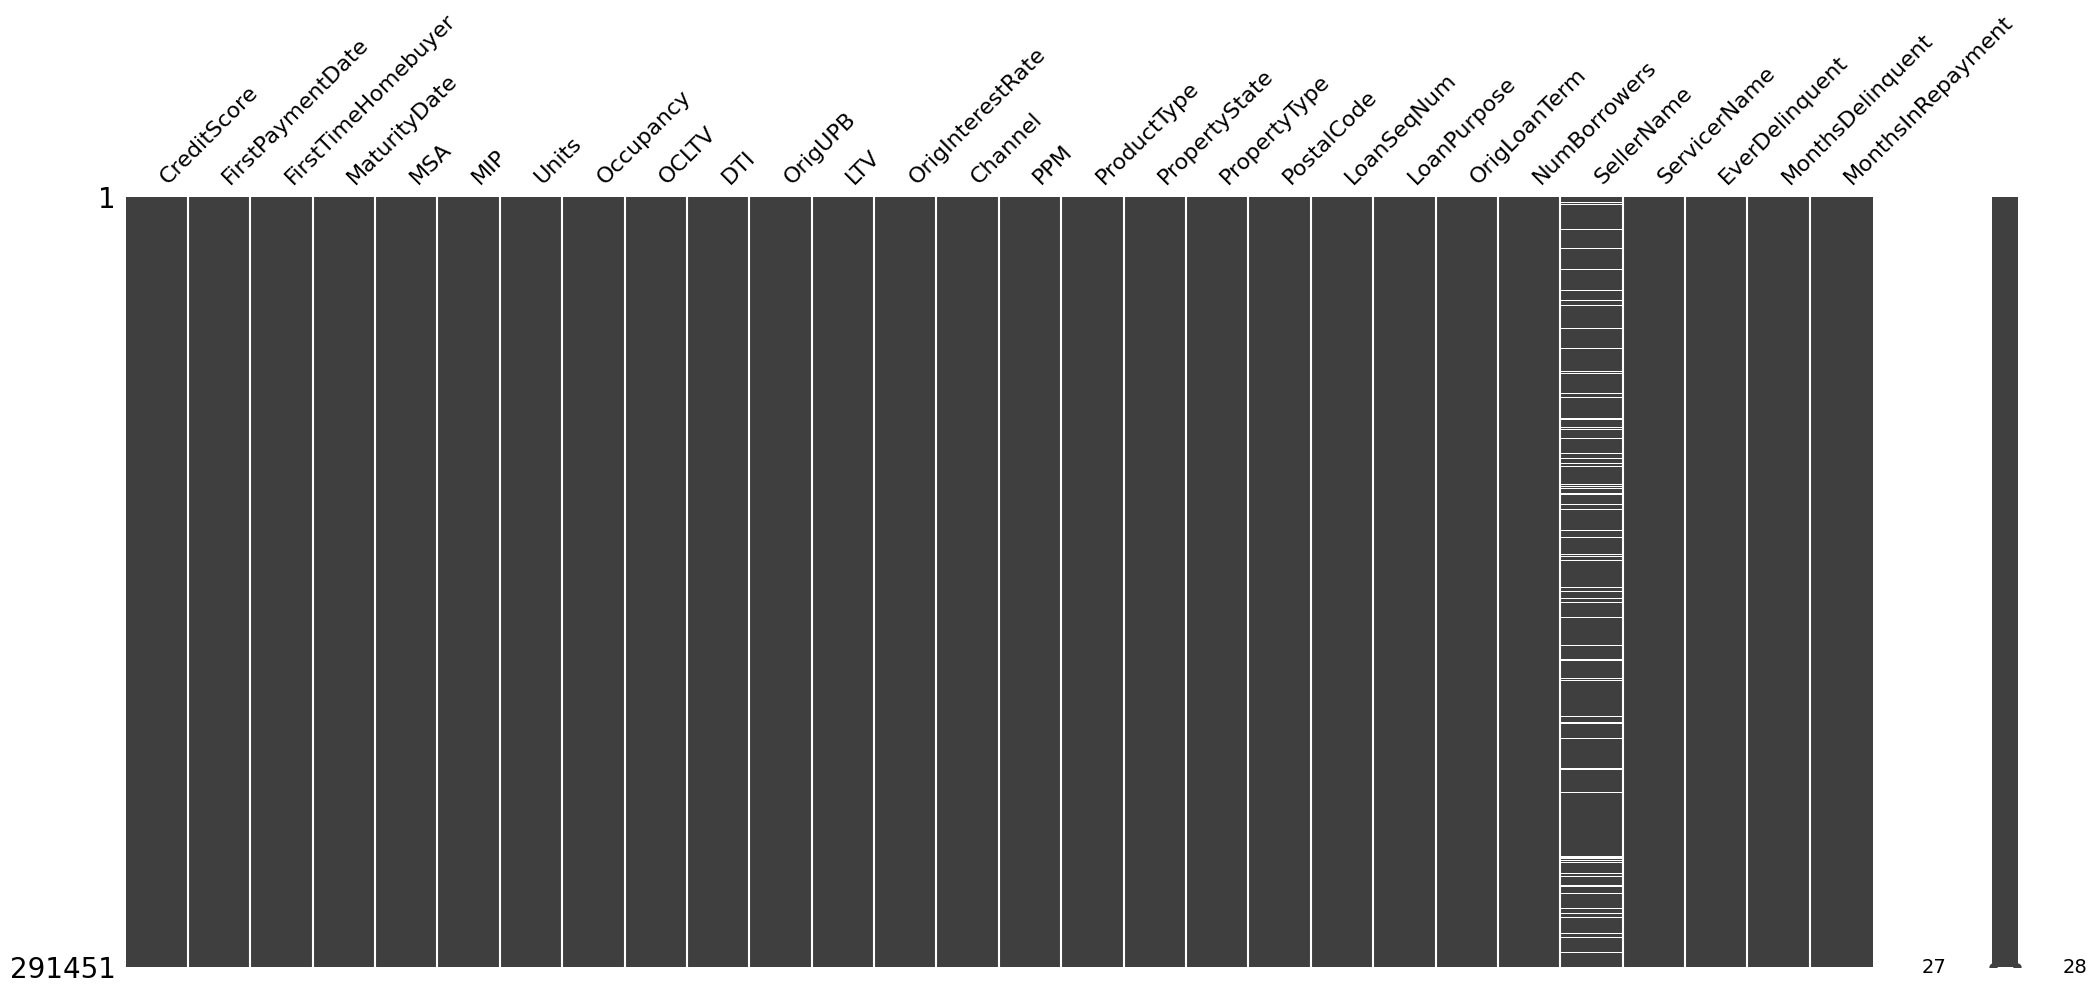

In [42]:
# Visualizing the missing values
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
msno.matrix(df)

In [43]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

###Column Description

CreditScore: The credit score of the borrower(s) at the time the mortgage loan was originated. This is an important factor in determining creditworthiness.

FirstPaymentDate: The date when the first payment on the mortgage loan is due.

FirstTimeHomebuyer: A binary variable indicating whether the borrower is a first-time homebuyer.

MaturityDate: The date when the mortgage loan is scheduled to be fully repaid.

MSA: Metropolitan Statistical Area, which provides information about the geographical area where the property is located.

MIP: Mortgage Insurance Premium, which may be required for certain loans with a low down payment.

Units: The number of housing units in the property (e.g., single-family, multi-unit property).

Occupancy: The occupancy status of the property (e.g., owner-occupied, non-owner-occupied).

OCLTV: Original Combined Loan-to-Value ratio, which indicates the ratio of the loan amount to the appraised value of the property at the time of origination.

DTI: Debt-to-Income ratio, which measures the borrower's debt obligations relative to their income.

OrigUPB: Original Unpaid Principal Balance, which is the initial loan amount when the mortgage was originated.

LTV: Loan-to-Value ratio, indicating the ratio of the loan amount to the property's current appraised value.

OrigInterestRate: The original interest rate at which the mortgage loan was issued.

Channel: The channel through which the mortgage loan was originated (e.g., retail, wholesale, correspondent).

PPM: Property Preservation and Maintenance program, indicating whether the property is subject to such a program.

ProductType: The type of mortgage product (e.g., fixed-rate, adjustable-rate, etc.).

PropertyState: The state where the property securing the mortgage loan is located.

PropertyType: The type of property (e.g., single-family, condominium, etc.).

PostalCode: The postal code or ZIP code of the property.

LoanSeqNum: A unique identifier for the mortgage loan.

LoanPurpose: The purpose of the mortgage loan (e.g., purchase, refinance).

OrigLoanTerm: The original term (in months) of the mortgage loan.

NumBorrowers: The number of borrowers on the mortgage loan.

SellerName: The name of the organization that sold the mortgage to the entity maintaining the dataset.

ServicerName: The name of the organization servicing the mortgage loan.

EverDelinquent: A binary variable indicating whether the mortgage loan has ever been delinquent.

MonthsDelinquent: The number of months the mortgage loan has been delinquent.

MonthsInRepayment: The number of months the mortgage loan has been in repayment.

###Data

In [44]:
# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [46]:
# Dataset Describe
df.describe(include = 'all')

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451,291451.000000,291451,291451.000000,291451.000000,291451,291451.000000,291451.000000,...,291451,291451,291451,291451.000000,291451,266457,291451,291451.000000,291451.000000,291451.000000
unique,NaN,NaN,3,NaN,392,NaN,NaN,3,NaN,NaN,...,1767,291451,3,NaN,3,20,20,NaN,NaN,NaN
top,NaN,NaN,N,NaN,X,NaN,NaN,O,NaN,NaN,...,94500,F199Q1268030,P,NaN,2,Ot,Other servicers,NaN,NaN,NaN
freq,NaN,NaN,184154,NaN,39100,NaN,NaN,276131,NaN,NaN,...,2582,1,123404,NaN,187335,76943,64043,NaN,NaN,NaN
mean,708.936991,199904.760553,NaN,202902.367043,NaN,9.216685,1.026022,NaN,76.960529,30.033453,...,NaN,NaN,NaN,359.835375,NaN,NaN,NaN,0.197848,1.837729,60.805291
std,68.408791,13.821228,NaN,16.090508,NaN,12.648273,0.202986,NaN,15.236154,13.203974,...,NaN,NaN,NaN,2.286939,NaN,NaN,NaN,0.398378,8.809392,46.142599
min,0.000000,199901.000000,NaN,202402.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,NaN,NaN,NaN,301.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,NaN,202902.000000,NaN,0.000000,1.000000,NaN,70.000000,22.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,NaN,202903.000000,NaN,0.000000,1.000000,NaN,80.000000,31.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,NaN,202904.000000,NaN,25.000000,1.000000,NaN,90.000000,39.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,63.000000


In [47]:
# Check Unique Values for each variable.
# Listingand  values whose count is less than 25
for column in df.columns:
  res = len(df[column].unique())
  print(f"\nUnique Variables in {column} column are: {res}")
  data_type = df[column].dtype
  print('Datatype :',data_type)
  if res<25:
    x = df[column].unique()
    print('The unique values are: ', x )


Unique Variables in CreditScore column are: 370
Datatype : int64

Unique Variables in FirstPaymentDate column are: 66
Datatype : int64

Unique Variables in FirstTimeHomebuyer column are: 3
Datatype : object
The unique values are:  ['N' 'X' 'Y']

Unique Variables in MaturityDate column are: 96
Datatype : int64

Unique Variables in MSA column are: 392
Datatype : object

Unique Variables in MIP column are: 37
Datatype : int64

Unique Variables in Units column are: 5
Datatype : int64
The unique values are:  [1 2 4 3 0]

Unique Variables in Occupancy column are: 3
Datatype : object
The unique values are:  ['O' 'I' 'S']

Unique Variables in OCLTV column are: 102
Datatype : int64

Unique Variables in DTI column are: 66
Datatype : int64

Unique Variables in OrigUPB column are: 375
Datatype : int64

Unique Variables in LTV column are: 97
Datatype : int64

Unique Variables in OrigInterestRate column are: 254
Datatype : float64

Unique Variables in Channel column are: 4
Datatype : object
The uni

In [48]:
categorical_columns = ['']

In [49]:
from datetime import datetime

df['FirstPaymentDate']=pd.to_datetime(df['FirstPaymentDate'],format=('%Y%M'))
df['MaturityDate']=pd.to_datetime(df['MaturityDate'],format=('%Y%M'))

In [50]:
mode = df['SellerName'].mode()[0]
df['SellerName'].fillna(mode, inplace=True)

In [51]:
df['Occupancy'] = df['Occupancy'].replace({'O': '0', 'I': '1'}, regex=True)
df['FirstTimeHomebuyer'] = df['FirstTimeHomebuyer'].replace({'N': '0', 'Y': '1','X':'2'}, regex=True)

In [52]:
df['MonthsDelinquent'].value_counts()

0      233788
1       23161
2        7572
3        3823
4        2459
        ...  
153         1
178         1
159         1
163         1
171         1
Name: MonthsDelinquent, Length: 174, dtype: int64

In [53]:
# Replace NaN and inf with appropriate values, e.g., 0
df['EverDelinquent'] = df['EverDelinquent'].replace([float('NaN'), float('inf')], 0)

# Convert the float_column to int
df['EverDelinquent'] = df['EverDelinquent'].astype(int)

# Replace NaN and inf with appropriate values, e.g., 0
df['MonthsDelinquent'] = df['MonthsDelinquent'].replace([float('NaN'), float('inf')], 0)

# Convert the float_column to int
df['MonthsDelinquent'] = df['MonthsDelinquent'].astype(int)

In [54]:
# df['LTV'].drop(axis=1, inplace=True)
df.drop('LTV', axis=1, inplace=True)

<ipython-input-55-9f4c84ecf877>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=2.5)


<Axes: >

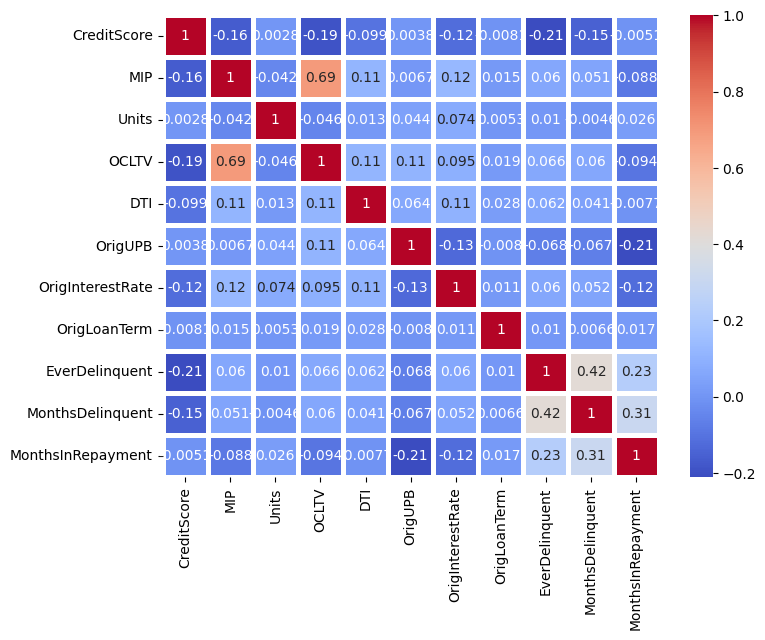

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=2.5)

In [56]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-01-01 00:02:00,0,2029-01-01 00:01:00,16974,25,1,0,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-01-01 00:02:00,0,2029-01-01 00:01:00,19740,0,1,0,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,1999-01-01 00:02:00,0,2029-01-01 00:01:00,29940,0,1,0,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,1999-01-01 00:02:00,0,2029-01-01 00:01:00,31084,0,1,0,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,1999-01-01 00:02:00,0,2029-01-01 00:01:00,35644,0,1,0,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [57]:
df['OrigInterestRate'].value_counts()

6.875     69884
6.750     46762
7.000     44927
7.125     23664
6.625     23568
          ...  
6.883         1
6.100         1
8.070         1
11.125        1
5.800         1
Name: OrigInterestRate, Length: 254, dtype: int64

In [58]:
df['EverDelinquent'].nunique()

2

##**Data Visualisation**

In [59]:
# Chart - 1 visualization code
# plotting count plot
sns.countplot(x=df['Gender'], data=df)

# setting chart title
plt.title('male and female customers proportion')

# display chart
plt.show()

# printing the counts for reference
print(df.Gender.value_counts())

KeyError: ignored